# Обработка пропусков в данных, кодирование категориальных признаков, масштабирование данных.

### Цель лабораторной работы:

Изучение способов предварительной обработки данных для дальнейшего формирования моделей.

### Задание:


    1) Выбрать набор данных (датасет), содержащий категориальные признаки и пропуски в данных. Для выполнения следующих пунктов можно использовать несколько различных наборов данных (один для обработки пропусков, другой для категориальных признаков и т.д.)
    
    2) Для выбранного датасета (датасетов) на основе материалов лекции решить следующие задачи:
        a) обработку пропусков в данных;
        b) кодирование категориальных признаков;
        c) масштабирование данных.


### Импорт библиотек

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from io import StringIO
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer
%matplotlib inline 
sns.set(style="ticks")

### Смотрим на датасет

In [2]:
data = pd.read_csv('./coffee_shop_sales.csv')

In [3]:
print('Строк:       {}'.format(data.shape[0]))
print('Столбцов:    {}'.format(data.shape[1]))

Строк:       149116
Столбцов:    18


In [4]:
data.head()

,transaction_id,transaction_date,transaction_time,store_id,store_location,product_id,transaction_qty,unit_price,Total_Bill,product_category,product_type,product_detail,Size,Month Name,Day Name,Hour,Month,Day of Week
0,114301,01-06-2023,11:33:29,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Thursday,11,6,3
1,115405,02-06-2023,11:18:24,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Friday,11,6,4
2,115478,02-06-2023,12:02:45,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Friday,12,6,4
3,116288,02-06-2023,19:39:47,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Friday,19,6,4
4,116714,03-06-2023,12:24:57,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Saturday,12,6,5


In [5]:
data.isnull().sum()

transaction_id      0
transaction_date    0
transaction_time    0
store_id            0
store_location      0
product_id          0
transaction_qty     0
unit_price          0
Total_Bill          0
product_category    0
product_type        0
product_detail      0
Size                0
Month Name          0
Day Name            0
Hour                0
Month               0
Day of Week         0
dtype: int64

### Заполнение отсутствующих полей

In [6]:
filled_data = data

In [7]:
# Замена отсутствующих данных на "Unknown"
filled_data = filled_data.fillna('U')

In [8]:
filled_data.isnull().sum()

transaction_id      0
transaction_date    0
transaction_time    0
store_id            0
store_location      0
product_id          0
transaction_qty     0
unit_price          0
Total_Bill          0
product_category    0
product_type        0
product_detail      0
Size                0
Month Name          0
Day Name            0
Hour                0
Month               0
Day of Week         0
dtype: int64

### Удаление строк с отсутствующими значениями

In [9]:
del_data = data.dropna()

In [10]:
del_data.isnull().sum()

transaction_id      0
transaction_date    0
transaction_time    0
store_id            0
store_location      0
product_id          0
transaction_qty     0
unit_price          0
Total_Bill          0
product_category    0
product_type        0
product_detail      0
Size                0
Month Name          0
Day Name            0
Hour                0
Month               0
Day of Week         0
dtype: int64

In [11]:
print('Строк до удаления:          {}'.format(data.shape[0]))
print('Строк после удаления:       {}'.format(del_data.shape[0]))

Строк до удаления:          149116
Строк после удаления:       149116


# 2) Кодирование категориальных признаков

#### Подход №1 - Найти и заменить

In [12]:
filled_data.dtypes

transaction_id        int64
transaction_date     object
transaction_time     object
store_id              int64
store_location       object
product_id            int64
transaction_qty       int64
unit_price          float64
Total_Bill          float64
product_category     object
product_type         object
product_detail       object
Size                 object
Month Name           object
Day Name             object
Hour                  int64
Month                 int64
Day of Week           int64
dtype: object

In [13]:
filled_data.head()

,transaction_id,transaction_date,transaction_time,store_id,store_location,product_id,transaction_qty,unit_price,Total_Bill,product_category,product_type,product_detail,Size,Month Name,Day Name,Hour,Month,Day of Week
0,114301,01-06-2023,11:33:29,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Thursday,11,6,3
1,115405,02-06-2023,11:18:24,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Friday,11,6,4
2,115478,02-06-2023,12:02:45,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Friday,12,6,4
3,116288,02-06-2023,19:39:47,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Friday,19,6,4
4,116714,03-06-2023,12:24:57,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Saturday,12,6,5


In [14]:
filled_data["Month Name"].value_counts()

Month Name
June        35352
May         33527
April       25335
March       21229
January     17314
February    16359
Name: count, dtype: int64

In [15]:
cleanup_nums = {"Month Name":     {"May": 5, "June": 6, "July": 7, "February": 2}}

filled_data = filled_data.replace(cleanup_nums)

In [16]:
filled_data["Month Name"].value_counts()

Month Name
6          35352
5          33527
April      25335
March      21229
January    17314
2          16359
Name: count, dtype: int64

#### Подход №2 - Кодирование метки

In [17]:
filled_data.head()

,transaction_id,transaction_date,transaction_time,store_id,store_location,product_id,transaction_qty,unit_price,Total_Bill,product_category,product_type,product_detail,Size,Month Name,Day Name,Hour,Month,Day of Week
0,114301,01-06-2023,11:33:29,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,6,Thursday,11,6,3
1,115405,02-06-2023,11:18:24,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,6,Friday,11,6,4
2,115478,02-06-2023,12:02:45,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,6,Friday,12,6,4
3,116288,02-06-2023,19:39:47,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,6,Friday,19,6,4
4,116714,03-06-2023,12:24:57,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,6,Saturday,12,6,5


In [18]:
filled_data["store_id"].value_counts()

store_id
8    50735
3    50599
5    47782
Name: count, dtype: int64

In [19]:
le = LabelEncoder()
AT_le = le.fit_transform(filled_data['store_id'])


In [20]:
AT_le

array([0, 0, 0, ..., 2, 2, 2])

In [21]:
np.unique(AT_le)

array([0, 1, 2])

In [22]:
AT_le.size

149116

In [23]:
filled_data.head()

,transaction_id,transaction_date,transaction_time,store_id,store_location,product_id,transaction_qty,unit_price,Total_Bill,product_category,product_type,product_detail,Size,Month Name,Day Name,Hour,Month,Day of Week
0,114301,01-06-2023,11:33:29,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,6,Thursday,11,6,3
1,115405,02-06-2023,11:18:24,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,6,Friday,11,6,4
2,115478,02-06-2023,12:02:45,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,6,Friday,12,6,4
3,116288,02-06-2023,19:39:47,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,6,Friday,19,6,4
4,116714,03-06-2023,12:24:57,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,6,Saturday,12,6,5


In [24]:
filled_data['store_id'] = AT_le
filled_data.head()

,transaction_id,transaction_date,transaction_time,store_id,store_location,product_id,transaction_qty,unit_price,Total_Bill,product_category,product_type,product_detail,Size,Month Name,Day Name,Hour,Month,Day of Week
0,114301,01-06-2023,11:33:29,0,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,6,Thursday,11,6,3
1,115405,02-06-2023,11:18:24,0,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,6,Friday,11,6,4
2,115478,02-06-2023,12:02:45,0,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,6,Friday,12,6,4
3,116288,02-06-2023,19:39:47,0,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,6,Friday,19,6,4
4,116714,03-06-2023,12:24:57,0,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,6,Saturday,12,6,5


# 3) Масштабирование данных

In [25]:
filled_data.head()

,transaction_id,transaction_date,transaction_time,store_id,store_location,product_id,transaction_qty,unit_price,Total_Bill,product_category,product_type,product_detail,Size,Month Name,Day Name,Hour,Month,Day of Week
0,114301,01-06-2023,11:33:29,0,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,6,Thursday,11,6,3
1,115405,02-06-2023,11:18:24,0,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,6,Friday,11,6,4
2,115478,02-06-2023,12:02:45,0,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,6,Friday,12,6,4
3,116288,02-06-2023,19:39:47,0,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,6,Friday,19,6,4
4,116714,03-06-2023,12:24:57,0,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,6,Saturday,12,6,5


C:\Users\Andresh\AppData\Local\Temp\ipykernel_16716\1571690449.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(filled_data['product_id'])


<Axes: xlabel='product_id', ylabel='Density'>

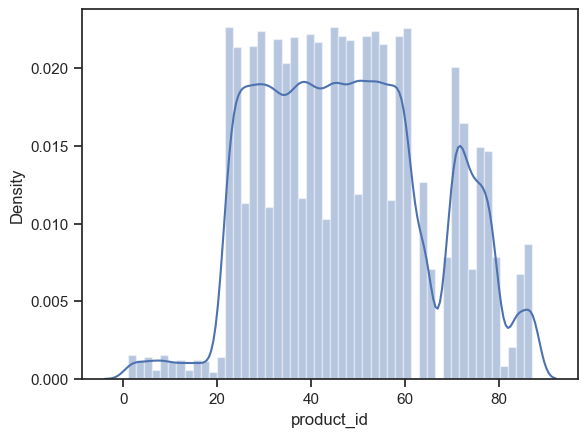

In [28]:
sns.distplot(filled_data['product_id'])

In [29]:
scl = MinMaxScaler()
scl_data = scl.fit_transform(filled_data[['product_id']])
filled_data['Duration'] = scl_data

C:\Users\Andresh\AppData\Local\Temp\ipykernel_16716\1571690449.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(filled_data['product_id'])


<Axes: xlabel='product_id', ylabel='Density'>

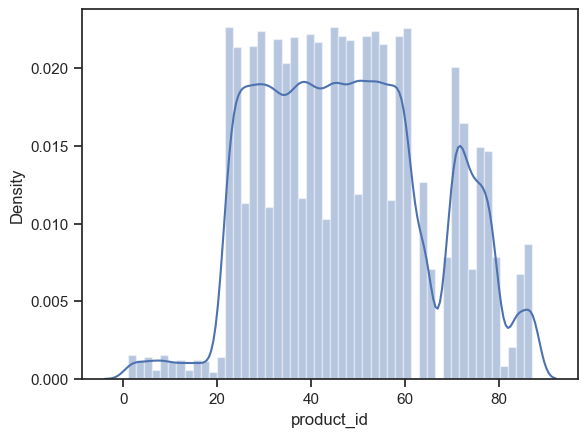

In [30]:
sns.distplot(filled_data['product_id'])

In [33]:

import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Загрузка данных
dataset_path = "coffee_shop_sales.csv"
df = pd.read_csv(dataset_path)

# Обработка пропусков
imputer = SimpleImputer(strategy="most_frequent")
df.fillna(df.mode().iloc[0], inplace=True)  # Заполняем пропуски модой

# Кодирование категориальных признаков
categorical_features = ["store_location", "product_category", "product_type", "Size", "Day Name"]
encoder = OneHotEncoder(sparse_output=False, drop="first")
encoded_features = encoder.fit_transform(df[categorical_features])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_features))
df = df.drop(columns=categorical_features).reset_index(drop=True)
df = pd.concat([df, encoded_df], axis=1)

# Масштабирование числовых данных
numeric_features = ["unit_price", "Total_Bill", "Hour", "Month"]
scaler = StandardScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])

# Вывод первых строк обработанного датасета
df.head()


,transaction_id,transaction_date,transaction_time,store_id,product_id,transaction_qty,unit_price,Total_Bill,product_detail,Month Name,...,product_type_Sugar free syrup,Size_Not Defined,Size_Regular,Size_Small,Day Name_Monday,Day Name_Saturday,Day Name_Sunday,Day Name_Thursday,Day Name_Tuesday,Day Name_Wednesday
0,114301,01-06-2023,11:33:29,3,45,1,-0.143761,-0.398943,Peppermint,June,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,115405,02-06-2023,11:18:24,3,45,1,-0.143761,-0.398943,Peppermint,June,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,115478,02-06-2023,12:02:45,3,45,1,-0.143761,-0.398943,Peppermint,June,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,116288,02-06-2023,19:39:47,3,45,1,-0.143761,-0.398943,Peppermint,June,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,116714,03-06-2023,12:24:57,3,45,1,-0.143761,-0.398943,Peppermint,June,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
